In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image = cv2.imread('1-Rose.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)


Highpass Filter


(-0.5, 224.5, 224.5, -0.5)

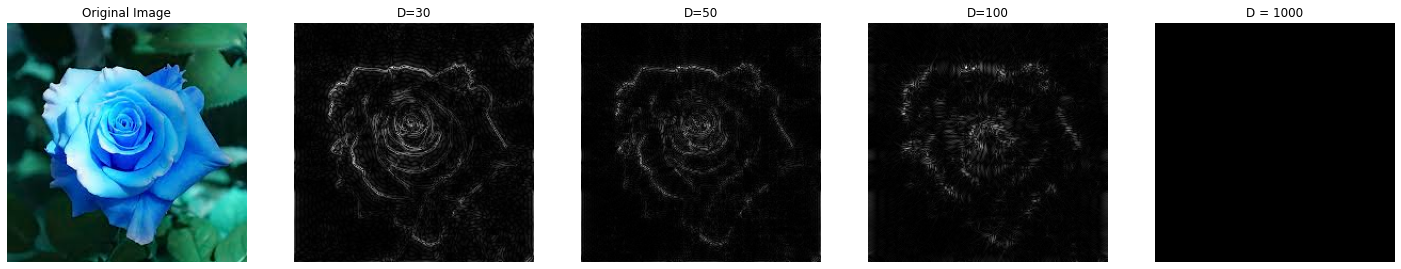

In [9]:
# Michael Putra Handidjaja_C14210184

def high_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.ones((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 0
    return mask

def inverse_image(image):
    f_ishift = np.fft.ifftshift(image)
    image_back_filter = np.fft.ifft2(f_ishift)
    image_back_filter = np.abs(image_back_filter)

    return image_back_filter

height, width, channel = image.shape
f = np.fft.fft2(gray)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

hpf_mask_30 = fshift * high_pass_filter(width, height, 30)
hpf_mask_30 = inverse_image(hpf_mask_30)
hpf_mask_50 = fshift * high_pass_filter(width, height, 50)
hpf_mask_50 = inverse_image(hpf_mask_50)
hpf_mask_100 = fshift * high_pass_filter(width, height, 100)
hpf_mask_100 = inverse_image(hpf_mask_100)
hpf_mask_1000 = fshift * high_pass_filter(width, height, 1000)
hpf_mask_1000 = inverse_image(hpf_mask_1000)

print("Highpass Filter")
plt.figure(figsize=(30,30))

plt.subplot(1,6,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(hpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(hpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(hpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(hpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')

Lowpass Filter


(-0.5, 224.5, 224.5, -0.5)

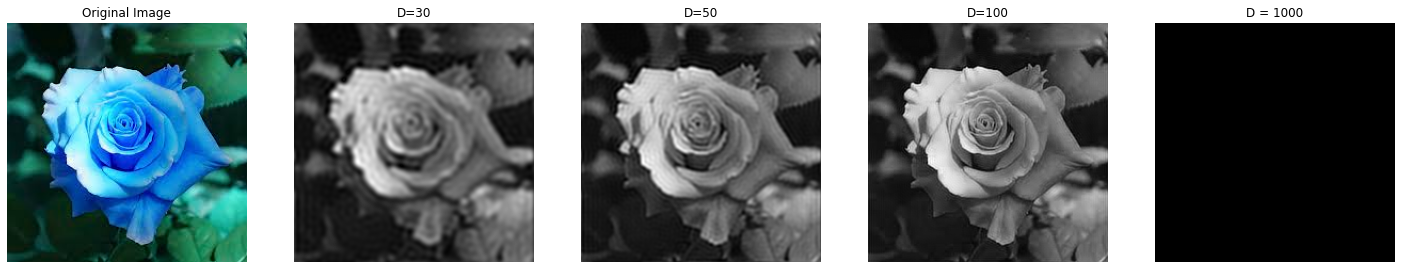

In [11]:
# Michael Putra Handidjaja_C14210184
def low_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.zeros((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 1
    return mask    

lpf_mask_30 = fshift * low_pass_filter(width, height, 30)
lpf_mask_30 = inverse_image(lpf_mask_30)
lpf_mask_50 = fshift * low_pass_filter(width, height, 50)
lpf_mask_50 = inverse_image(lpf_mask_50)
lpf_mask_100 = fshift * low_pass_filter(width, height, 100)
lpf_mask_100 = inverse_image(lpf_mask_100)
lpf_mask_1000 = fshift * high_pass_filter(width, height, 1000)
lpf_mask_1000 = inverse_image(lpf_mask_1000)

print("Lowpass Filter")
plt.figure(figsize=(30,30))

plt.subplot(1,6,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(lpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(lpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(lpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(lpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')